# DHASARATHAN T
#INTERNSAVY

# Task-2 : Use Clustering Techniques for the any customer dataset using machine learning.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop('CustomerID',inplace=True,axis=1)

In [12]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income_(k$)','Spending Score (1-100)':'Spending_Score_(1-100)'}, inplace = True)

In [13]:
df['Genre'] = df['Genre'].map({'Female': 1, 'Male': 0})

In [14]:
X = df.iloc[:,[2,3]].values

## K-Means Clustering

In [15]:
# finding wcss value for different number of clusters

wcss = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)

    wcss.append(km.inertia_)

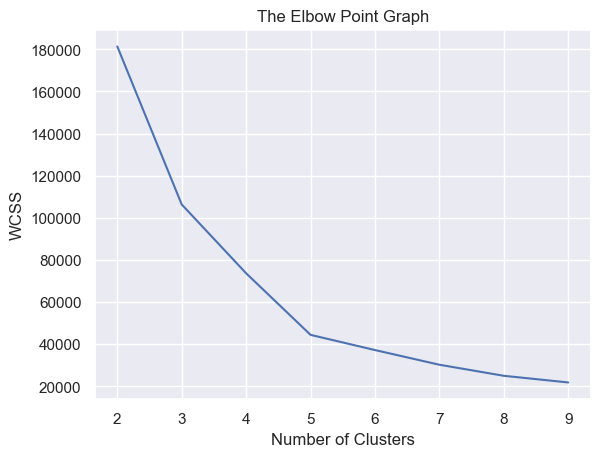

In [16]:
# plot an elbow graph

sns.set()
plt.plot(range(2,10), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)
df["Target"]=Y

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


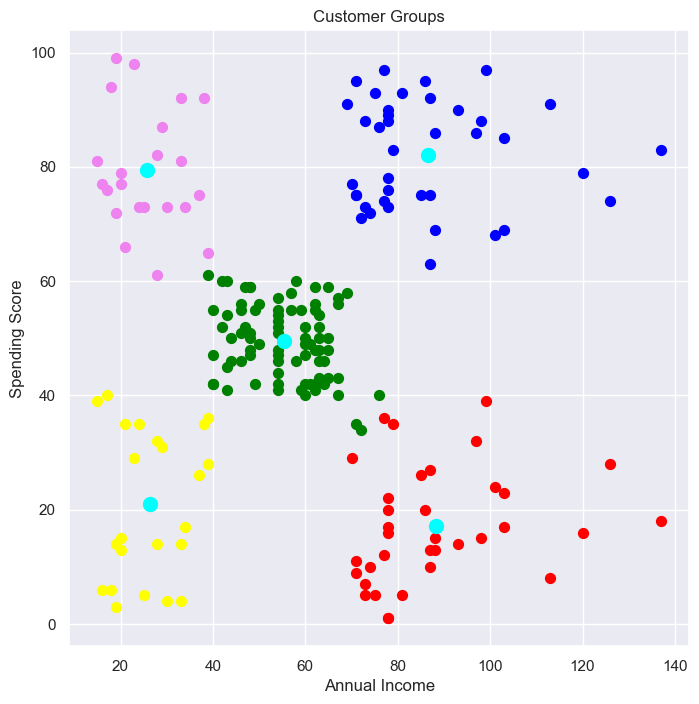

In [18]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
X_train = df[['Age','Annual_Income_(k$)', 'Spending_Score_(1-100)']]

In [21]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_dataset= X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [22]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,157
1,34
-1,9


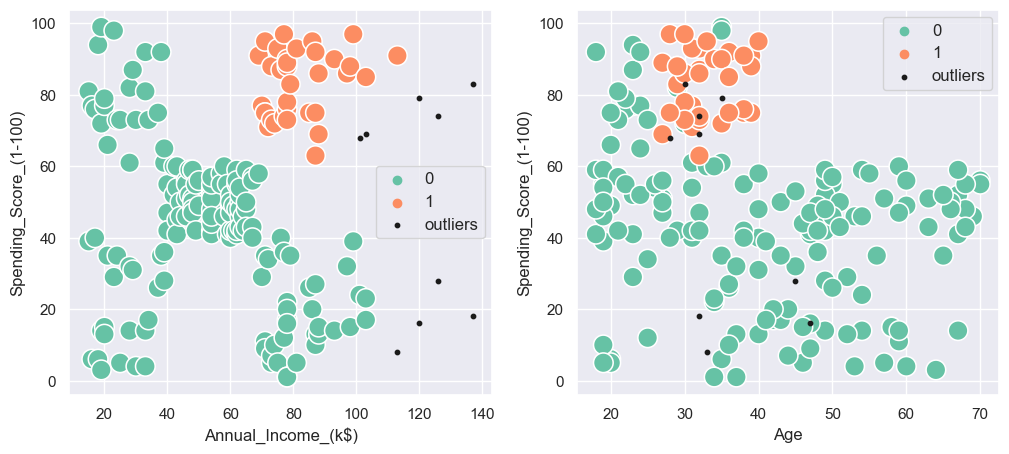

In [23]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending_Score_(1-100)',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual_Income_(k$)'], outliers['Spending_Score_(1-100)'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending_Score_(1-100)'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

## Hierarchical Clustering

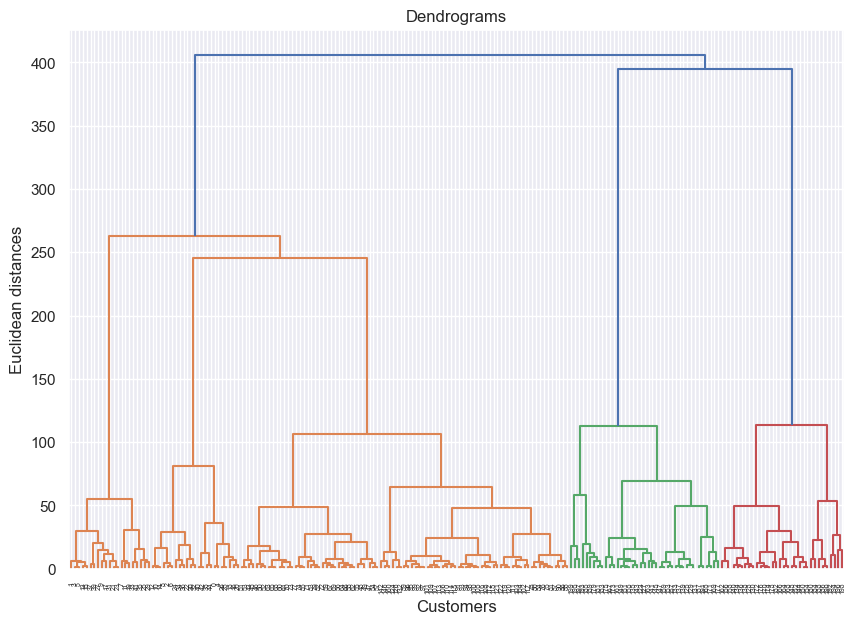

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cls=cluster.fit_predict(X)

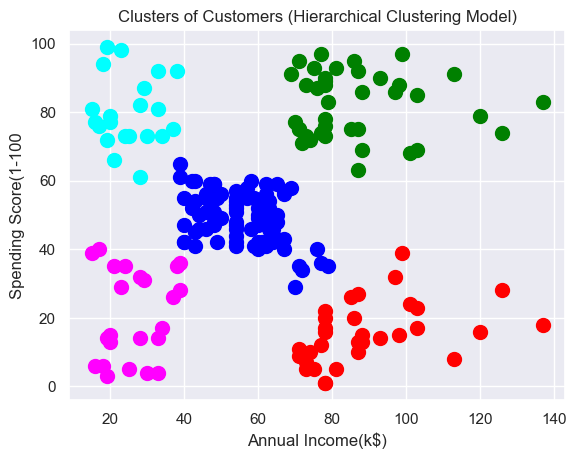

In [26]:
plt.scatter(X[cls==0, 0], X[cls==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cls==1, 0], X[cls==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[cls==2, 0], X[cls==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[cls==3, 0], X[cls==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[cls==4, 0], X[cls==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

* Note: So the number of clusters are 5.

In [27]:
df

,Genre,Age,Annual_Income_(k$),Spending_Score_(1-100),Target
0,0,19,15,39,2
1,0,21,15,81,3
2,1,20,16,6,2
3,1,23,16,77,3
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,4
196,1,45,126,28,1
197,0,32,126,74,4
198,0,32,137,18,1


<AxesSubplot:xlabel='Target', ylabel='count'>

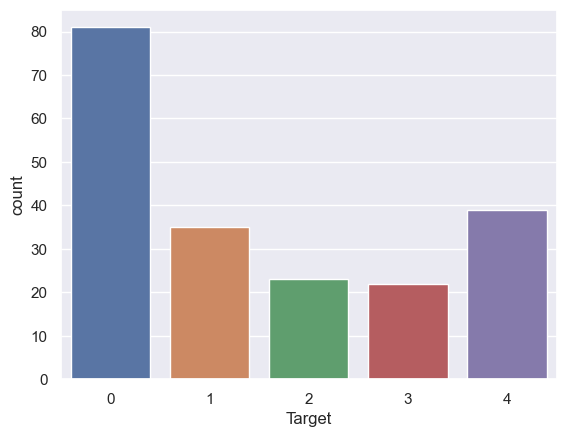

In [28]:
sns.countplot(data=df,x="Target")

In [29]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1000)

In [31]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs

In [32]:
from sklearn.linear_model import LogisticRegression as lg
lr = lg().fit(x_train,y_train)
Pred1 = lr.predict(x_test)
Pred1

D:\new_anaconda\anacondanew\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 2, 4, 4, 0, 0, 2, 4, 0, 4, 0, 4, 2, 0, 0, 4, 4, 1, 2, 1, 0, 3,
       2, 3, 0, 4, 0, 1, 0, 1, 1, 4, 0, 0, 0, 3, 2, 0, 3, 0, 1, 4, 2, 4,
       4, 4, 0, 0, 1, 4])

In [33]:
print("Training Accuracy:",lr.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred1))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred1))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred1))

Training Accuracy: 0.88
------------------------------------------------------------
Testing Accuracy:
 0.86
-------------------------------------------------
Confusion Matrix:
 [[16  1  3  0  1]
 [ 0  6  0  0  0]
 [ 1  0  4  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 13]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.86      1.00      0.92         6
           2       0.57      0.80      0.67         5
           3       1.00      1.00      1.00         4
           4       0.93      0.93      0.93        14

    accuracy                           0.86        50
   macro avg       0.85      0.90      0.87        50
weighted avg       0.87      0.86      0.86        50



In [34]:
from sklearn.tree import DecisionTreeClassifier as dtc

dt = dtc().fit(x_train,y_train)
Pred2 = dt.predict(x_test)
Pred2

array([0, 0, 4, 4, 0, 0, 2, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 1, 2, 0, 0, 3,
       0, 3, 0, 4, 0, 1, 1, 1, 1, 4, 0, 0, 2, 3, 2, 0, 3, 4, 1, 4, 2, 4,
       4, 4, 0, 0, 1, 4])

In [35]:
print("Training Accuracy:",dt.score(x_train,y_train))
print("------------------------------------------------------------")
print(" Testing Accuracy:\n" ,acs(y_test,Pred2))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred2))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred2))

Training Accuracy: 1.0
------------------------------------------------------------
 Testing Accuracy:
 0.92
-------------------------------------------------
Confusion Matrix:
 [[18  2  0  0  1]
 [ 1  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 14]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.71      0.83      0.77         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       0.93      1.00      0.97        14

    accuracy                           0.92        50
   macro avg       0.92      0.94      0.93        50
weighted avg       0.92      0.92      0.92        50



In [36]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [37]:
from sklearn.ensemble import RandomForestClassifier as rfc
rf = rfc().fit(x_train,y_train)
Pred = rf.predict(x_test)
Pred

array([0, 0, 4, 4, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 1, 2, 1, 0, 3,
       0, 3, 0, 4, 0, 1, 1, 1, 1, 4, 0, 0, 2, 3, 2, 0, 3, 4, 1, 4, 2, 4,
       4, 4, 0, 0, 1, 4])

In [38]:
print("Training Accuracy:",rf.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:\n" ,acs(y_test,Pred))
print("-------------------------------------------------")
print("Confusion Matrix:\n",  cm(y_test,Pred))
print("-------------------------------------------------")
print("Classsification Report:\n",cr(y_test,Pred))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy:
 0.96
-------------------------------------------------
Confusion Matrix:
 [[19  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 14]]
-------------------------------------------------
Classsification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        14

    accuracy                           0.96        50
   macro avg       0.95      0.98      0.96        50
weighted avg       0.97      0.96      0.96        50

